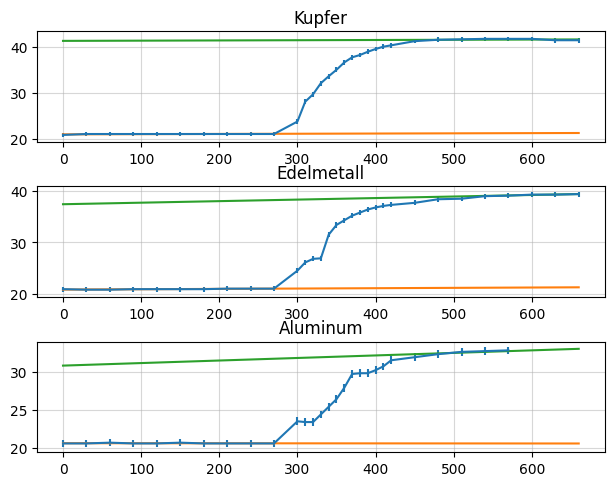

Vorkurve Kupfer: m= 0.0004444444444443922 b= 21.02444444444446
Vorkurve Alu: m= -5.5555555555591676e-05 b= 20.6288888888889
Vorkurve Edel: m= 0.0006666666666666176 b= 20.82000000000001
Nachkurve Kupfer: m= 0.00047619047619049213 b= 41.26071428571428
Nachkurve Alu: m= 0.0033333333333332264 b= 30.80000000000005
Nachkurve Edel: m= 0.0030000000000000343 b= 37.42999999999996
C_Kal_Alu:  628.394
C_Kal_Edel 498.597
C_Kal_Kupf 456.727
Fehler C_Kal:  4.203848831725518
m_vor Fehler: 0.001166967057437023
n_vor Fehler: 0.16667623438307502
m_nach Fehler: 0.00023671816019013895
n_nach Fehler: 0.13238239563110268


In [60]:
import numpy as np
import sympy as sym
from sympy import *
import matplotlib.pyplot as plt

sym.init_printing()

t1 = np.linspace(0, 4.5*60, 10)
t2 = np.linspace(5*60, 7*60, (7-5)*6 + 1)
t3 = np.linspace(7.5*60, 11*60, 8)

t = np.concatenate((t1, t2, t3))

Temp_Alu = [20.6, 20.6, 20.7, 20.6, 20.6, 20.7, 20.6, 20.6, 20.6, 20.6, 23.5, 23.4, 23.4, 24.4, 25.4, 26.4, 27.9, 29.7, 29.8, 29.8, 30.2, 30.7, 31.5, 31.9, 32.3, 32.6, 32.7, 32.8]
Temp_Kupf = [20.9, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1 ,23.8, 28.1, 29.7, 32.1, 33.6, 35, 36.6, 37.7, 38.2, 38.9, 39.5, 40, 40.3, 41.2, 41.5, 41.6, 41.7, 41.7, 41.7, 41.4, 41.4]
Temp_Edel = [20.9, 20.8,20.8, 20.9, 20.9, 20.9, 20.9, 21, 21, 21, 24.5, 26.1, 26.8, 26.9, 31.5, 33.4, 34.3, 35.2, 35.8, 36.4, 36.8, 37.1, 37.3, 37.7, 38.4, 38.5, 39, 39.1, 39.3, 39.3, 39.4]

yerr = 0.5 # Kelvin

vor_Kupfer = Temp_Kupf[0:9]
vor_Alu = Temp_Kupf[0:9]
vor_Edel = Temp_Kupf[0:9]
vor_t = t[0:9]
nach_t = t[len(Temp_Kupf)-8:]

nach_Kupfer = Temp_Kupf[len(Temp_Kupf)-8:]
nach_Alu = Temp_Alu[len(Temp_Alu)-2:]
nach_Edel = Temp_Edel[len(Temp_Edel)-4:]

m_1, b_1 = np.polyfit(t[0:9], Temp_Kupf[0:9], 1)
m_2, b_2 = np.polyfit(t[0:9], Temp_Alu[0:9], 1)
m_3, b_3 = np.polyfit(t[0:9], Temp_Edel[0:9], 1)

m_12, b_12 = np.polyfit(t[len(Temp_Kupf)-8:], Temp_Kupf[len(Temp_Kupf)-8:], 1)
m_22, b_22 = np.polyfit(t[len(Temp_Alu)-2:len(Temp_Alu) + 1], Temp_Alu[len(Temp_Alu)-3:], 1)
m_32, b_32 = np.polyfit(t[len(Temp_Edel)-4:], Temp_Edel[len(Temp_Edel)-4:], 1)

#f = plt.figure()
figure, ax = plt.subplots(nrows = 3, ncols = 1)
figure.tight_layout()

ax[0].errorbar(t, Temp_Kupf, label='Kupfer', yerr=0.5)
ax[0].plot(t, m_1*t + b_1)
ax[0].set_title('Kupfer')
ax[0].plot(t, m_12*t + b_12)
ax[1].errorbar(t, Temp_Edel, label='Edelmetall', yerr=0.5)
ax[1].plot(t, m_3*t + b_3)
ax[1].set_title('Edelmetall')
ax[1].plot(t, m_32*t + b_32)
ax[2].errorbar(t[0:len(Temp_Alu)], Temp_Alu, label='Aluminium', yerr=0.5)
ax[2].plot(t, m_2*t + b_2)
ax[2].set_title('Aluminum')
ax[2].plot(t, m_22*t + b_22)

for i in range(3):
    ax[i].grid()
    ax[i].grid(which='minor', alpha=0.2)
    ax[i].grid(which='major', alpha=0.5)
#ax.legend(loc='lower right')
plt.show()

print("Vorkurve Kupfer: m=", m_1, "b=", b_1)
print("Vorkurve Alu: m=", m_2, "b=", b_2)
print("Vorkurve Edel: m=", m_3, "b=", b_3)

print("Nachkurve Kupfer: m=", m_12, "b=", b_12)
print("Nachkurve Alu: m=", m_22, "b=", b_22)
print("Nachkurve Edel: m=", m_32, "b=", b_32)

def mult(x_1, x_2):
    out = np.empty(len(x_1))
    if (len(x_1) != len(x_2)):
        return
    for i in range(len(x_1)):
        out[i] = x_1[i] * x_2[i]
    return out

m_vor_err = ((yerr**2) / (len(vor_Kupfer)* (np.sum(mult(t[0:9], t[0:9])) / len(vor_Kupfer)) - (np.sum(vor_Kupfer) / len(vor_Kupfer))))**0.5
n_vor_err = (np.sum(mult(vor_t, vor_t)) / len(vor_t))**0.5 * m_vor_err
m_nach_err = ((yerr**2) / (len(nach_Kupfer)* (np.sum(mult(t, t)) / len(nach_Kupfer)) - (np.sum(nach_Kupfer) / len(nach_Kupfer))))**0.5
n_nach_err = (np.sum(mult(nach_t, nach_t)) / len(nach_t))**0.5 * m_nach_err


C_Kal_Alu, C_Kal_Kupf, C_Kal_Edel, C_zyl = sym.symbols('C_Kal_Alu, C_Kal_Kupf, C_Kal_Edel C_zyl')

C_zyl = 0.090 * 376

C_Kal_Alu = 0.142 * 4187 + C_zyl
C_Kal_Kupf =  0.101 * 4187 + C_zyl
C_Kal_Edel = 0.111 * 4187 + C_zyl

print("C_Kal_Alu: ", C_Kal_Alu)
print("C_Kal_Edel", C_Kal_Edel)
print("C_Kal_Kupf", C_Kal_Kupf)

mass_err = sym.symbols('dm')
mass_err = 1e-3

print("Fehler C_Kal: ", mass_err * (4187**2 + 376**2)**0.5)

print("m_vor Fehler:", m_vor_err)
print("n_vor Fehler:", n_vor_err)
print("m_nach Fehler:", m_nach_err)
print("n_nach Fehler:", n_nach_err)
